In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ROOT_PATH = "/content/drive/MyDrive/car dataset/test/Audi/CD"

In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/car dataset/test/Audi/CD'

In [ ]:
# re-size all the images to this

IMAGE_SIZE = [224,224]

train_path = "/content/drive/MyDrive/car dataset/test/Audi/CD/train"
valid_path = "/content/drive/MyDrive/car dataset/test/Audi/CD/test"

In [ ]:
#import the vgg16 library as shown below and add preprocessing  layer to the front of VGG here we will be using imagenet weights

vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet',include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#don't train existing weights
c = 0
for layer in vgg16.layers:
  print(layer)
  c += 1

In [ ]:
c

19

In [ ]:
#don't train existing weights

for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
folders = glob("/content/drive/MyDrive/car dataset/test/Audi/CD/train")
folders

['/content/drive/MyDrive/car dataset/test/Audi/CD/train']

In [ ]:
len(folders)

1

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense (256, activation = 'relu'))
model.add(Dense (7, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21139271 (80.64 MB)
Trainable params: 6424583 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
!pwd

/content/drive/MyDrive/car dataset/test/Audi/CD


In [ ]:
# make
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/car dataset/test/Audi/CD/train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 1360 images belonging to 7 classes.


In [ ]:
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/car dataset/test/Audi/CD/test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 715 images belonging to 7 classes.


In [ ]:
r = model.fit(training_set,
              validation_data=testing_set,
              epochs=10,
              steps_per_epoch=len(training_set),
              validation_steps=len(testing_set))


Epoch 1/10
43/43 [==============================] - 542s 12s/step - loss: 2.9321 - accuracy: 0.4096 - val_loss: 1.0122 - val_accuracy: 0.6923
Epoch 2/10
43/43 [==============================] - 23s 531ms/step - loss: 0.7264 - accuracy: 0.7794 - val_loss: 0.7691 - val_accuracy: 0.7594
Epoch 3/10
43/43 [==============================] - 23s 527ms/step - loss: 0.5360 - accuracy: 0.8206 - val_loss: 0.6735 - val_accuracy: 0.7832
Epoch 4/10
43/43 [==============================] - 23s 527ms/step - loss: 0.2901 - accuracy: 0.9235 - val_loss: 0.6265 - val_accuracy: 0.7944
Epoch 5/10
43/43 [==============================] - 23s 524ms/step - loss: 0.2015 - accuracy: 0.9574 - val_loss: 0.7799 - val_accuracy: 0.7622
Epoch 6/10
43/43 [==============================] - 23s 535ms/step - loss: 0.1526 - accuracy: 0.9721 - val_loss: 0.5922 - val_accuracy: 0.8126
Epoch 7/10
43/43 [==============================] - 22s 521ms/step - loss: 0.1259 - accuracy: 0.9728 - val_loss: 0.4964 - val_accuracy: 0.8490


In [ ]:
import tensorflow as tf
import numpy as np

image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/car dataset/test/Rolls Royce/110.jpg')
image = image.resize((224, 224))  # Use the built-in resize function of the PIL library.
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, axis=0)

# Feed the image to the model.
predictions = model.predict(image)

# Postprocess the predictions.
predicted_class = np.argmax(predictions[0])

# Print the predicted class.
print(f'The predicted class is {predicted_class}.')



1/1 [==============================] - 0s 19ms/step
The predicted class is 3.


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Specify the file name of the uploaded image
image_file = "/content/drive/MyDrive/car dataset/test/Rolls Royce/101.jpg"  # Replace with the actual file name

# Load the uploaded image
img = load_img(image_file, target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)
img = tf.expand_dims(img, axis=0)

# Get predictions using your VGG-16 model
predictions = model.predict(img)

# Print the predictions
print(predictions)

1/1 [==============================] - 1s 808ms/step
[[3.1317705e-36 0.0000000e+00 2.3938585e-36 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the image
image_path = '/content/drive/MyDrive/car dataset/test/Rolls Royce/110.jpg'
image = load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of the VGG model
image_array = img_to_array(image)  # Convert the image to a NumPy array
expanded_image_array = tf.expand_dims(image_array, axis=0)  # Expand dimensions to match the batch size for the model

# Preprocess the image
preprocessed_image = preprocess_input(expanded_image_array)


In [ ]:
predictions = model.predict(preprocessed_image)

# Get the class index with the highest probability
predicted_class_index = tf.argmax(predictions, axis=1)[0].numpy()

# Get the class label
class_labels = ['Audi','Hyundai Creta','Mahindra Scorpio','Rolls Royce']  # List of class labels
predicted_class_label = class_labels[predicted_class_index]

print(f'The predicted class is {predicted_class_label}.')


1/1 [==============================] - 0s 27ms/step
The predicted class is Rolls Royce.


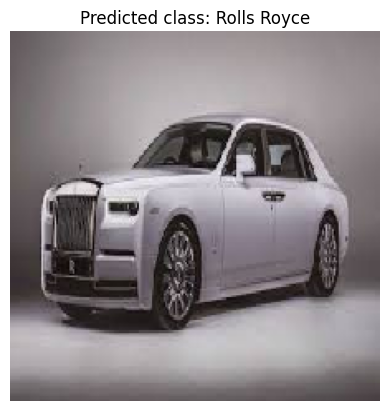

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')

# Add the predicted class label as the title
plt.title(f'Predicted class: {predicted_class_label}')

# Show the plot
plt.show()
